# Phase 3 - Feature Extraction:
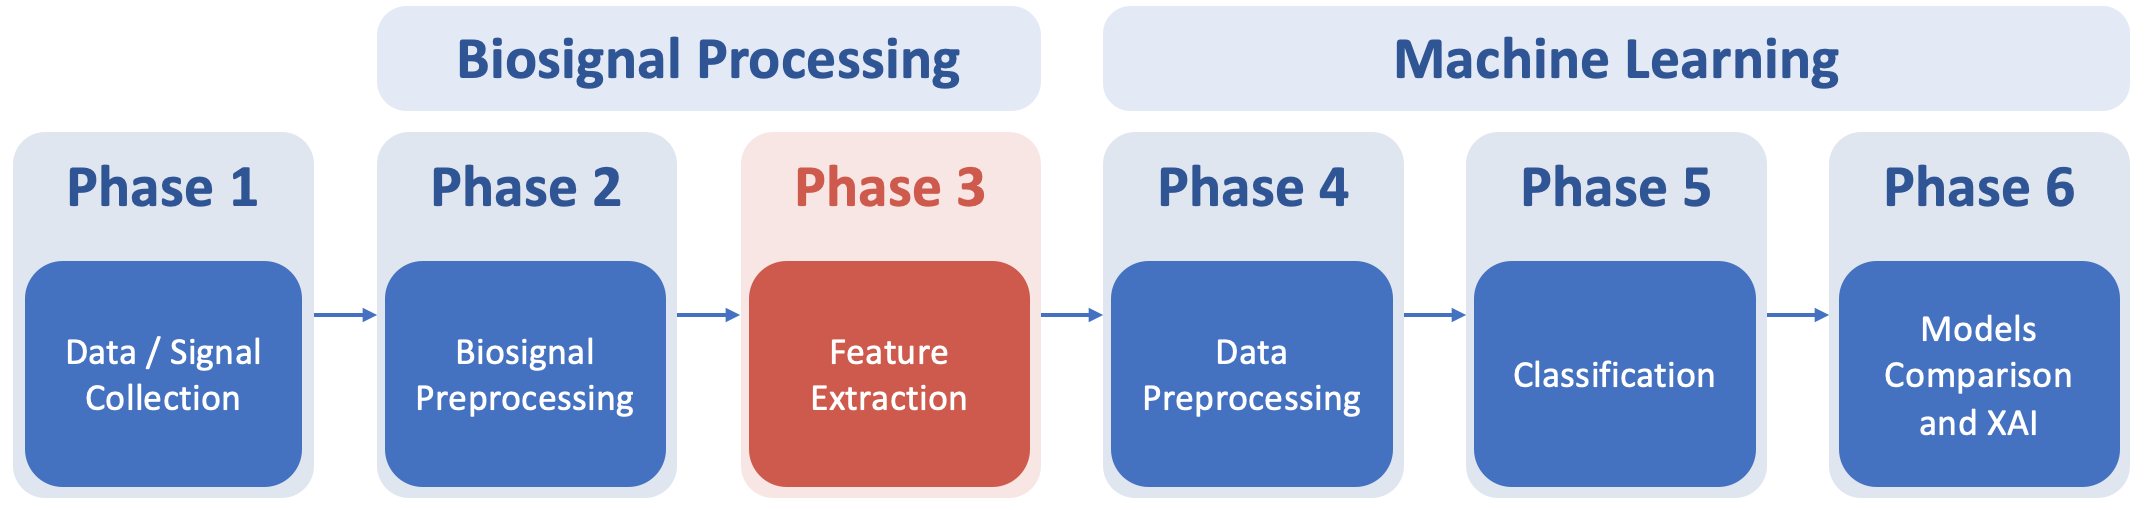
### Introduction: 
In this phase, different features are extracted from the preprocessed signals. These features are extracted from:
- Time-Domain
- Frequency Domain
- Time-Frequency Representation

All the features' types in this phase are in a form of values or images, which will direct the path of Machine Learning Model 'Phase 4'.

### Objective:
The objective of this phase is to extract all the possible features from the preprocessed signals, so that it can be used as data in the Machine Learning Phase (Phase 4).

### Notes:
- The dataset used in this Notebook is imported from the saved dataset (filtered_signals_v1.csv) from local machine, which had been created in Phase 2.
- All the functions and variables, which are used in this notebook, are imported from helpers.py file from the signal_processing package in the same repository.
- audio_index[0] is a normal PCG Signal.
- audio_index[51] is an abnormal PCG Signal.

In [1]:
# Importing libraries:
import pandas as pd
from glob import glob

import constants as c
from feature_extraction.helpers import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the saved csv file from Phase 2:
SIGNALS = pd.read_csv(f'{c.REPO_PATH}{c.SIG_PRE_PATH}/wavelet_transform/wavelet_transform_v1.csv')

In [3]:
# Creating a variables of normal and abnormal signals with index of 0 and 51 respectively:
NORMAL_SIGNAL = SIGNALS.iloc[0, :-1]
ABNORMAL_SIGNAL = SIGNALS.iloc[51, :-1]

## 1. Time-Domain Features:


### 1.1. Descriptive Statistics:
- It returns the descriptive statistics of the signal, which includes maxmimun, minimum, mean, median and standard diviation.

In [4]:
# Normal Signal:
MAX_NORMAL, MIN_NORMAL, MEAN_NORMAL, MEDIAN_NORMAL, STD_NORMAL = descriptive_statistics(NORMAL_SIGNAL)
# Abnormal Signal:
MAX_ABNORMAL, MIN_ABNORMAL, MEAN_ABNORMAL, MEDIAN_ABNORMAL, STD_ABNORMAL = descriptive_statistics(ABNORMAL_SIGNAL)

In [5]:
# Creating a DataFrame inclusing all the descriptive statistics variables:
DS_DATA = {'Normal': [MAX_NORMAL, MIN_NORMAL, MEAN_NORMAL, MEDIAN_NORMAL, STD_NORMAL],
        'Abnormal': [MAX_ABNORMAL, MIN_ABNORMAL, MEAN_ABNORMAL, MEDIAN_ABNORMAL, STD_ABNORMAL]}
DS_DATAFRAME = pd.DataFrame(DS_DATA, index=['Max', 'Min', 'Mean', 'Median', 'STD'])
DS_DATAFRAME

,Normal,Abnormal
Max,0.048334,0.218803
Min,-0.054609,-0.282963
Mean,-0.000183,-0.000034
Median,0.000061,0.001737
STD,0.007711,0.045282


### 1.2. Energy and Power:
- It returns the energy and the total power of the signal.
- The power of a signal is the sum of the absolute squares of its time-domain samples divided by the signal length.
- The murmur is a higher amplitude signal and hence is expected to have a higher value of this feature.

In [6]:
# Normal Signal:
ENERGY_NORMAL, POWER_NORMAL = energy_power(NORMAL_SIGNAL)
# Abnormal Signal:
ENERGY_ABNORMAL, POWER_ABNORMAL = energy_power(ABNORMAL_SIGNAL)

In [7]:
# Creating a DataFrame including the Energy and total Power of the signal:
EP_DATA = {'Normal': [ENERGY_NORMAL, POWER_NORMAL],
           'Abnormal': [ENERGY_ABNORMAL, POWER_ABNORMAL]}
EP_DATAFRAME = pd.DataFrame(EP_DATA, index=['Energy', 'Power'])
EP_DATAFRAME

,Normal,Abnormal
Energy,0.297441,10.252209
Power,0.000059,0.002050


### 1.3. Amplitude Envelope:
- It is the maximum amplitudes value among all samples in each frame, which indicates the level of loudness of the audio signal.
- It is however, sensitive to outliers.
- It  returns a list of values.

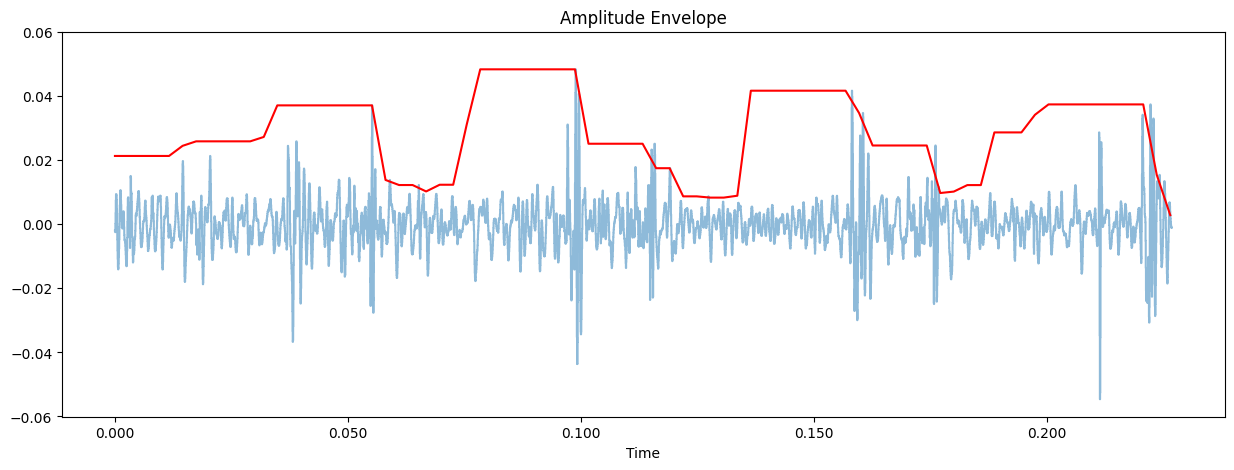

In [8]:
# Normal Signal:
amplitude_envelope(signal=NORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, plot=True, des_stats=False)

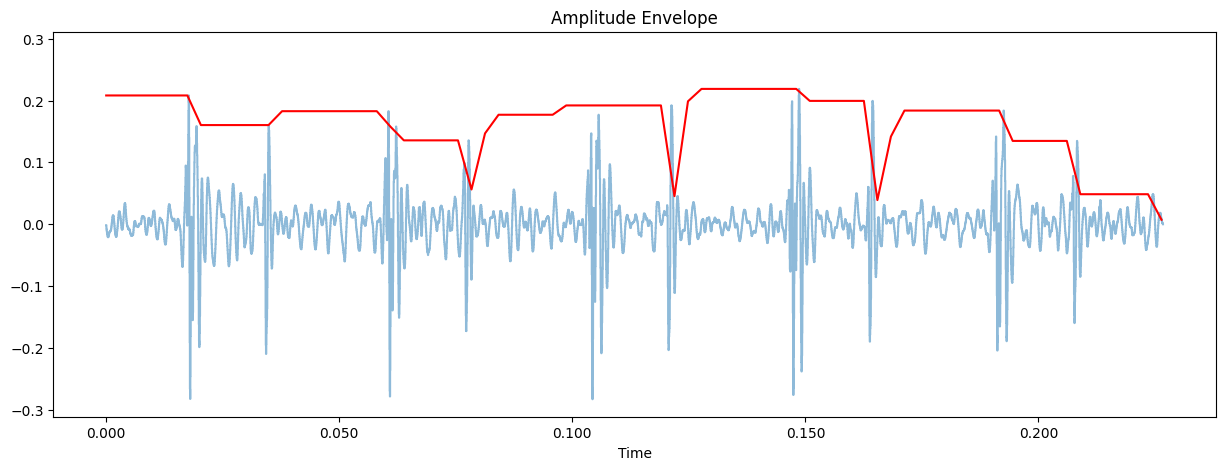

In [9]:
# Abnormal Signal:
amplitude_envelope(signal=ABNORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, plot=True, des_stats=False)

In [10]:
# Descriptive Statistics based on amplitude envelope:
AE_NORMAL_MAX, AE_NORMAL_MIN, AE_NORMAL_MEAN, AE_NORMAL_MEDIAN, AE_NORMAL_STD = amplitude_envelope(
    signal=NORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, plot=False, des_stats=True)
AE_ABNORMAL_MAX, AE_ABNORMAL_MIN, AE_ABNORMAL_MEAN, AE_ABNORMAL_MEDIAN, AE_ABNORMAL_STD = amplitude_envelope(
    signal=ABNORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, plot=False, des_stats=True)

In [11]:
# Creating DataFrame:
AE_DATA = {'Normal': [AE_NORMAL_MAX, AE_NORMAL_MIN, AE_NORMAL_MEAN, AE_NORMAL_MEDIAN, AE_NORMAL_STD],
        'Abnormal': [AE_ABNORMAL_MAX, AE_ABNORMAL_MIN, AE_ABNORMAL_MEAN, AE_ABNORMAL_MEDIAN, AE_ABNORMAL_STD]}
AE_DATAFRAME = pd.DataFrame(AE_DATA, index=['Max', 'Min', 'Mean', 'Median', 'STD'])
AE_DATAFRAME

,Normal,Abnormal
Max,0.048334,0.218803
Min,0.002818,0.007233
Mean,0.028496,0.164009
Median,0.025864,0.182772
STD,0.012406,0.051976


### 1.4. Root Mean Square Energy:
- The Root Mean Square Energy works by detecting the mean value within a frame, which is defined at the first step. 
- It acts as an indicator of loudness, since higher the energy, louder the sound. 
- It is however less sensitive to outliers as compared to the Amplitude Envelope.
- It  returns a list of values.

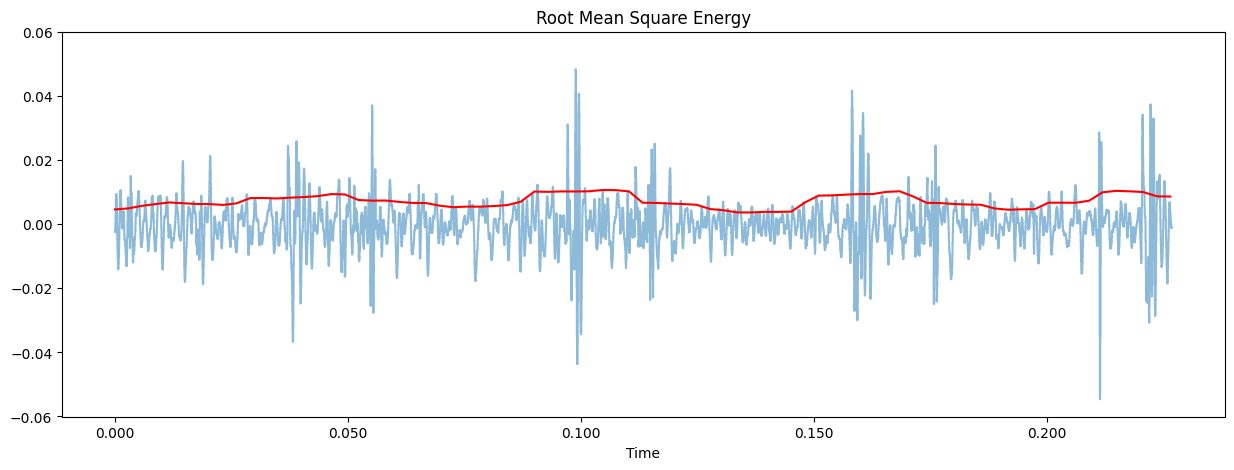

In [12]:
# Normal Signal:
root_mean_square(signal=NORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, plot=True, des_stats=False)

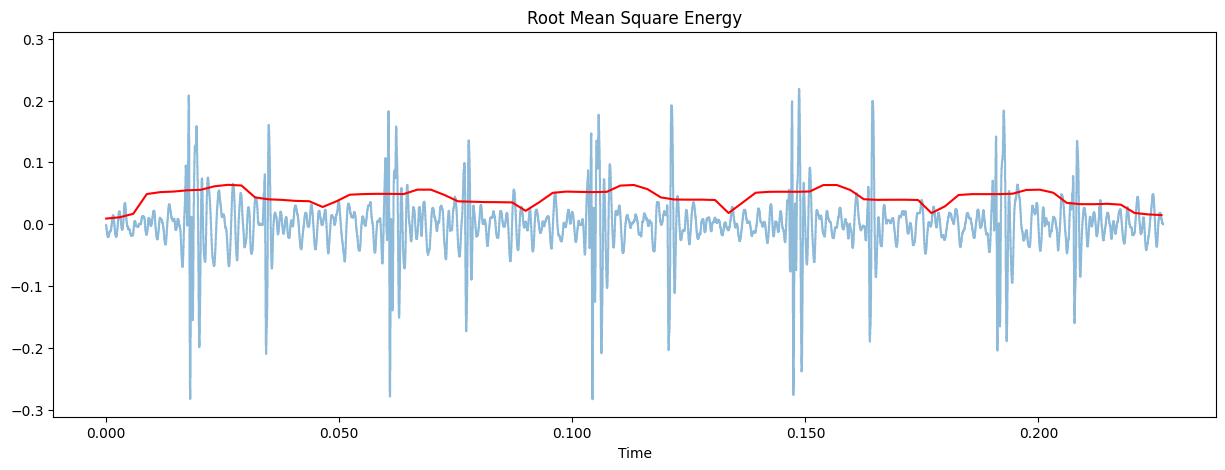

In [13]:
# Abnormal Signal:
root_mean_square(signal=ABNORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, plot=True, des_stats=False)

In [14]:
# Descriptive Statistics based on Root Mean Square Energy:
RM_NORMAL_MAX, RM_NORMAL_MIN, RM_NORMAL_MEAN, RM_NORMAL_MEDIAN, RM_NORMAL_STD = root_mean_square(
    signal=NORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, plot=False, des_stats=True)
RM_ABNORMAL_MAX, RM_ABNORMAL_MIN, RM_ABNORMAL_MEAN, RM_ABNORMAL_MEDIAN, RM_ABNORMAL_STD = root_mean_square(
    signal=ABNORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, plot=False, des_stats=True)

In [15]:
# Creating DataFrame:
RM_DATA = {'Normal': [RM_NORMAL_MAX, RM_NORMAL_MIN, RM_NORMAL_MEAN, RM_NORMAL_MEDIAN, RM_NORMAL_STD],
        'Abnormal': [RM_ABNORMAL_MAX, RM_ABNORMAL_MIN, RM_ABNORMAL_MEAN, RM_ABNORMAL_MEDIAN, RM_ABNORMAL_STD]}
RM_DATAFRAME = pd.DataFrame(RM_DATA, index=['Max', 'Min', 'Mean', 'Median', 'STD'])
RM_DATAFRAME

,Normal,Abnormal
Max,0.010662,0.063694
Min,0.003679,0.009152
Mean,0.007249,0.042971
Median,0.006714,0.047266
STD,0.001997,0.013192


### 1.5. Zero-Crossing Rate:
- It is the number of times a waveform crosses the horizontal time axis.
- It returns a list of values.

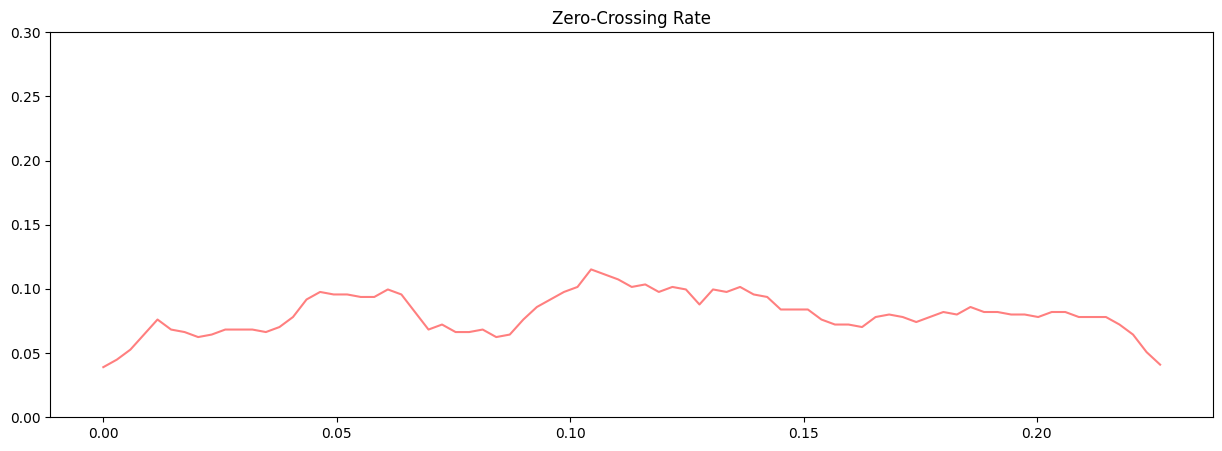

In [16]:
# Normal Signal:
zero_crossing_rate(signal=NORMAL_SIGNAL, frames=True, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, 
                   plot=True, des_stats=False)

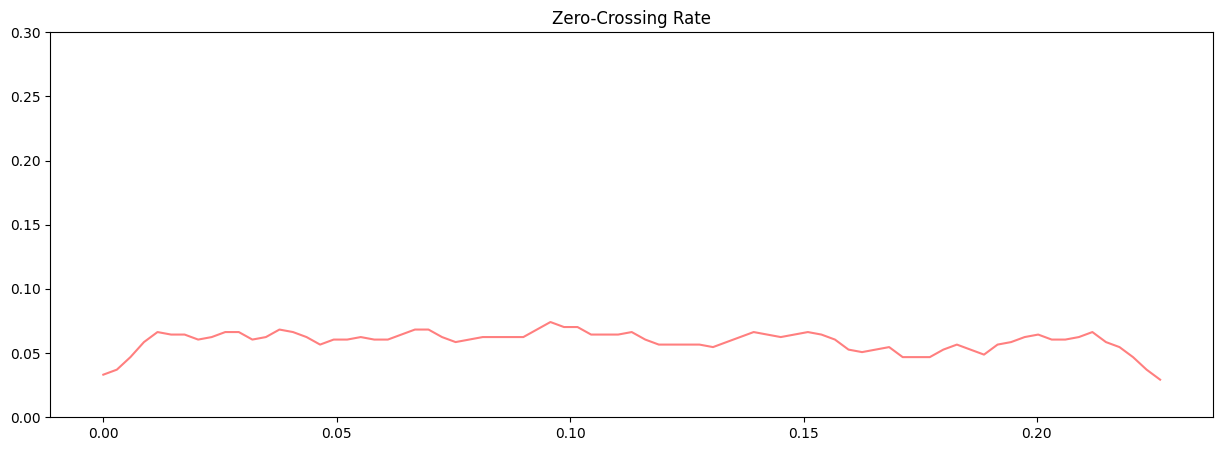

In [17]:
# Abnormal Signal:
zero_crossing_rate(signal=ABNORMAL_SIGNAL, frames=True, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, 
                   plot=True, des_stats=False)

In [18]:
# Descriptive Statistics based on Zero-Crossing Rate:
ZCR_NORMAL_MAX, ZCR_NORMAL_MIN, ZCR_NORMAL_MEAN, ZCR_NORMAL_MEDIAN, ZCR_NORMAL_STD = zero_crossing_rate(
    signal=NORMAL_SIGNAL, frames=True, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, plot=False, des_stats=True)

ZCR_ABNORMAL_MAX, ZCR_ABNORMAL_MIN, ZCR_ABNORMAL_MEAN, ZCR_ABNORMAL_MEDIAN, ZCR_ABNORMAL_STD = zero_crossing_rate(
    signal=ABNORMAL_SIGNAL, frames=True, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, plot=False, des_stats=True)

In [19]:
# Creating DataFrame:
ZCR_DATA = {'Normal': [ZCR_NORMAL_MAX, ZCR_NORMAL_MIN, ZCR_NORMAL_MEAN, ZCR_NORMAL_MEDIAN, ZCR_NORMAL_STD],
        'Abnormal': [ZCR_ABNORMAL_MAX, ZCR_ABNORMAL_MIN, ZCR_ABNORMAL_MEAN, ZCR_ABNORMAL_MEDIAN, ZCR_ABNORMAL_STD]}
ZCR_DATAFRAME = pd.DataFrame(ZCR_DATA, index=['Max', 'Min', 'Mean', 'Median', 'STD'])
ZCR_DATAFRAME

,Normal,Abnormal
Max,0.115234,0.074219
Min,0.039062,0.029297
Mean,0.080375,0.059212
Median,0.080078,0.060547
STD,0.015712,0.008284


In [20]:
# Zero-Crossing Rate based on the Whole Signal:
# Normal Signal:
ZCR_NORMAL = zero_crossing_rate(signal=NORMAL_SIGNAL, frames=False)
print(f'Normal: {ZCR_NORMAL}')
# Abnormal Signal:
ZCR_ABNORMAL = zero_crossing_rate(signal=ABNORMAL_SIGNAL, frames=False)
print(f'Abnormal: {ZCR_ABNORMAL}')

Normal: 0.0834
Abnormal: 0.0614


## Frequency-Domain Features:
### 2.1. Peak Frequency:
- It shows the frequency at which the peak amplitude occurs.
- Since the murmurs and normal signals vary in amplitude and frequency, it could have been a potential feature.

In [21]:
# Normal Signal:
PA_NORMAL, PF_NORMAL = peak_frequency(signal=NORMAL_SIGNAL, sr=c.SAMPLING_RATE, plot=False)
# Abnormal Signal:
PA_ABNORMAL, PF_ABNORMAL = peak_frequency(signal=ABNORMAL_SIGNAL, sr=c.SAMPLING_RATE, plot=False)

In [22]:
# Creating DataFrame:
PA_DATA = {'Normal': [PA_NORMAL, PF_NORMAL],
        'Abnormal': [PA_ABNORMAL, PF_ABNORMAL]}
PA_DATAFRAME = pd.DataFrame(PA_DATA, index=['Peak Amplitude', 'Peak Frequency'])
PA_DATAFRAME

,Normal,Abnormal
Peak Amplitude,4.623571,24.861907
Peak Frequency,29.005801,27.805561


### 2.2. Band Energy Ratio:
- It provides the relation between the lower and higher frequency bands.
- It starts with converting the Signal (Time-Domain) to Spectrogram (Time-Frequency Representation).
- Identifiying the frequency threshold in the Spectrogram of the signal, in which the above and below areas of this threshold are considered as high and low frequency areas. Then, it calculates the ratio within each frame.
- It returns a list of values.

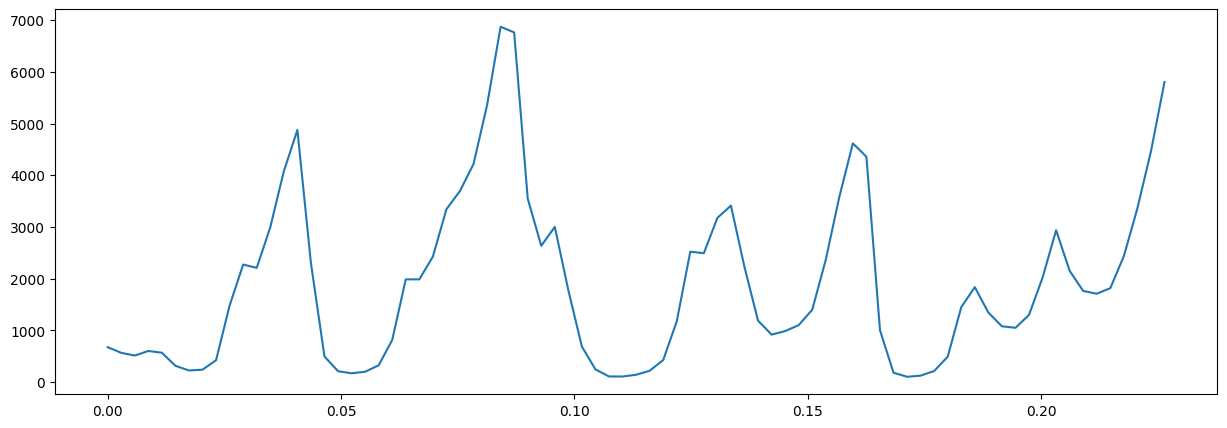

In [23]:
# Normal Signal:
band_energy_ratio(signal=NORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, 
                  split_frequency=c.SPLIT_FREQUENCY, sr=c.SAMPLING_RATE, plot=True, des_stats=False)

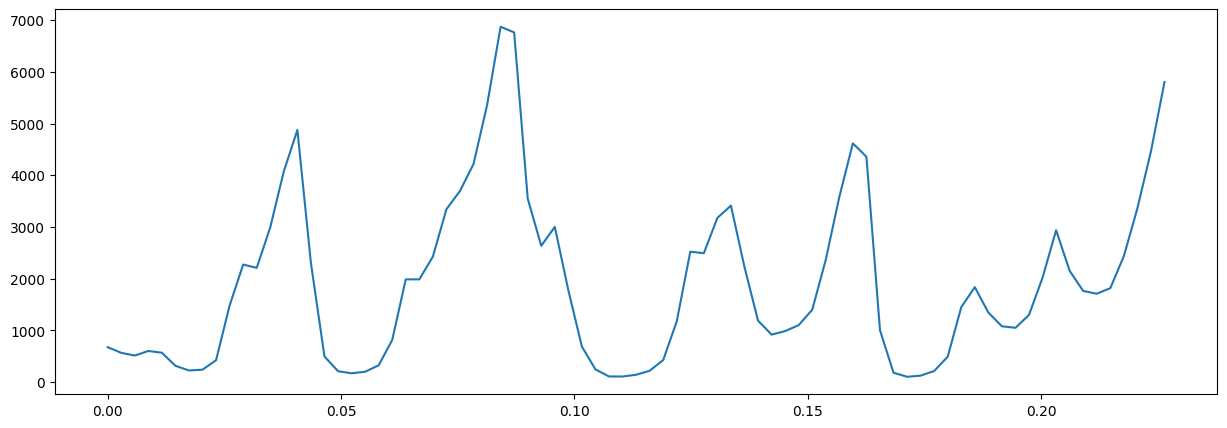

In [24]:
# Abnormal Signal:
band_energy_ratio(signal=NORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, 
                  split_frequency=c.SPLIT_FREQUENCY, sr=c.SAMPLING_RATE, plot=True, des_stats=False)

In [25]:
# Descriptive Statistics based on Band Energy Ratio:
BER_NORMAL_MAX, BER_NORMAL_MIN, BER_NORMAL_MEAN, BER_NORMAL_MEDIAN, BER_NORMAL_STD = band_energy_ratio(
    signal=NORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, split_frequency=c.SPLIT_FREQUENCY, 
    sr=c.SAMPLING_RATE, plot=False, des_stats=True)

BER_ABNORMAL_MAX, BER_ABNORMAL_MIN, BER_ABNORMAL_MEAN, BER_ABNORMAL_MEDIAN, BER_ABNORMAL_STD = band_energy_ratio(
    signal=ABNORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, split_frequency=c.SPLIT_FREQUENCY,
    sr=c.SAMPLING_RATE, plot=False, des_stats=True)

In [26]:
# Creating DataFrame:
BER_DATA = {'Normal': [BER_NORMAL_MAX, BER_NORMAL_MIN, BER_NORMAL_MEAN, BER_NORMAL_MEDIAN, BER_NORMAL_STD],
        'Abnormal': [BER_ABNORMAL_MAX, BER_ABNORMAL_MIN, BER_ABNORMAL_MEAN, BER_ABNORMAL_MEDIAN, BER_ABNORMAL_STD]}
BER_DATAFRAME = pd.DataFrame(BER_DATA, index=['Max', 'Min', 'Mean', 'Median', 'STD'])
BER_DATAFRAME

,Normal,Abnormal
Max,6871.414451,50457.963552
Min,102.330996,654.159729
Mean,1901.557430,12447.250009
Median,1481.367893,8799.996747
STD,1633.348458,10690.043513


### 2.3. Spectral Centroid:
- It provides the frequency band where most of the energy is concentrated.
- It returns a list of values.

<function matplotlib.pyplot.show(close=None, block=None)>

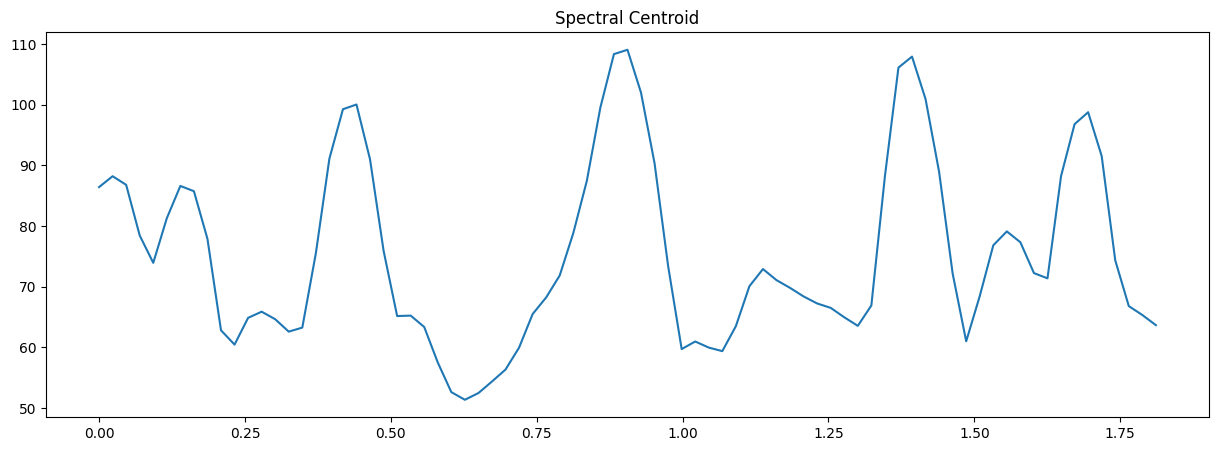

In [27]:
# Normal Signal:
spectral_centroid(signal=NORMAL_SIGNAL, sr=c.SAMPLING_RATE, frame_size=c.FRAME_SIZE, 
                  hop_size=c.HOP_SIZE, plot=True, des_stats=False)

<function matplotlib.pyplot.show(close=None, block=None)>

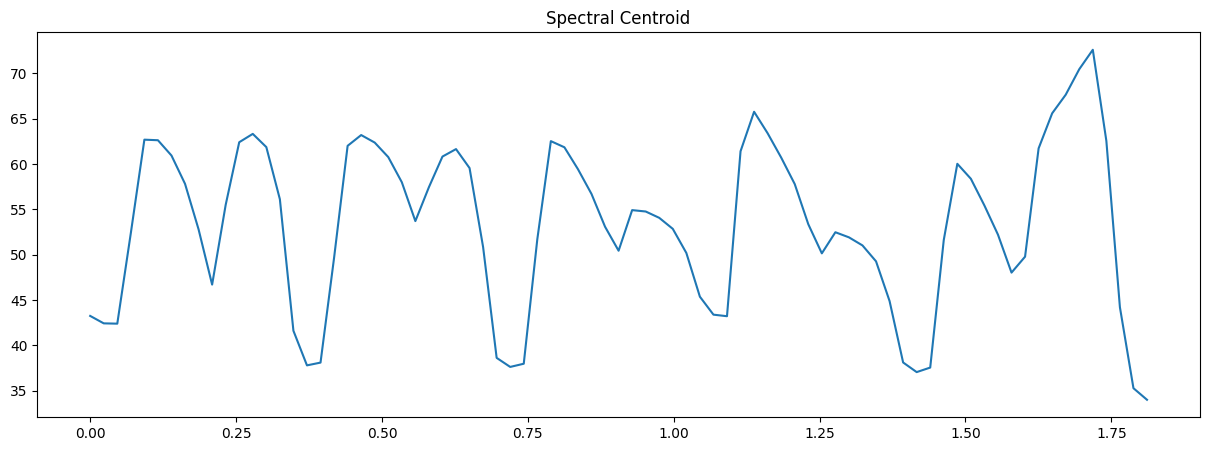

In [28]:
# Abnormal Signal:
spectral_centroid(signal=ABNORMAL_SIGNAL, sr=c.SAMPLING_RATE, frame_size=c.FRAME_SIZE, 
                  hop_size=c.HOP_SIZE, plot=True, des_stats=False)

In [29]:
# Descriptive Statistics based on Spectral Centriod:
SC_NORMAL_MAX, SC_NORMAL_MIN, SC_NORMAL_MEAN, SC_NORMAL_MEDIAN, SC_NORMAL_STD = spectral_centroid(
    signal=NORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, sr=c.SAMPLING_RATE, 
    plot=False, des_stats=True)

SC_ABNORMAL_MAX, SC_ABNORMAL_MIN, SC_ABNORMAL_MEAN, SC_ABNORMAL_MEDIAN, SC_ABNORMAL_STD = spectral_centroid(
    signal=ABNORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE,sr=c.SAMPLING_RATE, 
    plot=False, des_stats=True)

In [30]:
# Creating DataFrame:
SC_DATA = {'Normal': [SC_NORMAL_MAX, SC_NORMAL_MIN, SC_NORMAL_MEAN, SC_NORMAL_MEDIAN, SC_NORMAL_STD],
        'Abnormal': [SC_ABNORMAL_MAX, SC_ABNORMAL_MIN, SC_ABNORMAL_MEAN, SC_ABNORMAL_MEDIAN, SC_ABNORMAL_STD]}
SC_DATAFRAME = pd.DataFrame(SC_DATA, index=['Max', 'Min', 'Mean', 'Median', 'STD'])
SC_DATAFRAME

,Normal,Abnormal
Max,109.044212,72.618186
Min,51.365506,33.981695
Mean,75.397739,53.339475
Median,71.856019,53.706289
STD,14.885895,9.126300


### 2.4. Spectral Bandwidth:
- It is drived to the spectral centroid.
- It is the spectral range of interest around the centroid, that is, the variance from the spectral centroid.
- It returns a list of values.

<function matplotlib.pyplot.show(close=None, block=None)>

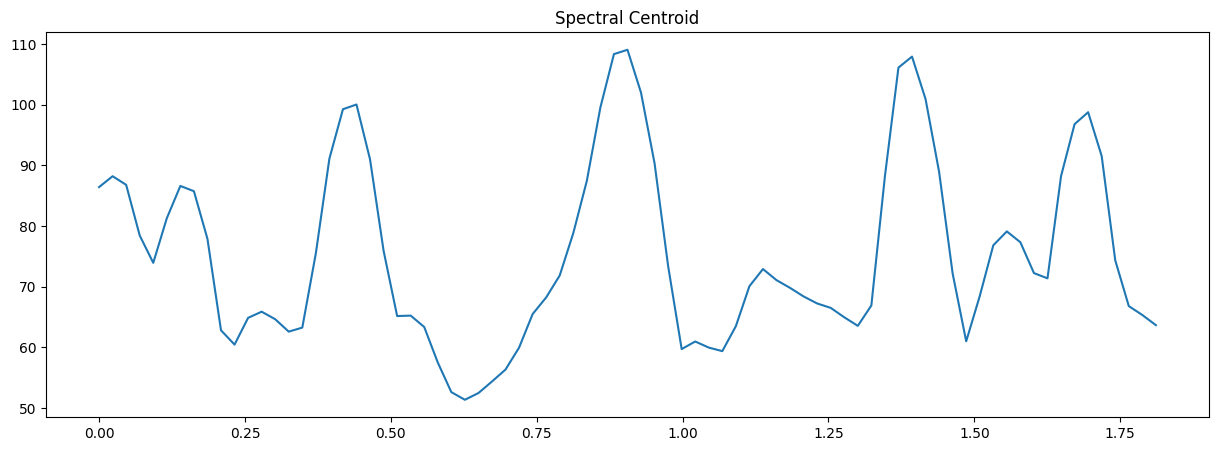

In [31]:
# Normal Signal:
spectral_centroid(signal=NORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, sr=c.SAMPLING_RATE, 
                  plot=True, des_stats=False)

<function matplotlib.pyplot.show(close=None, block=None)>

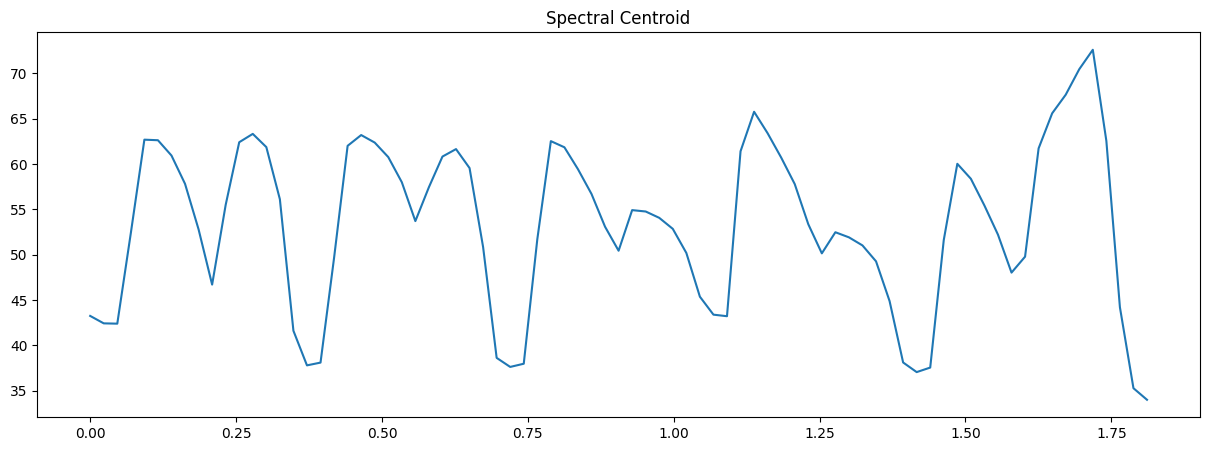

In [32]:
# Abnormal Signal:
spectral_centroid(signal=ABNORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE,sr=c.SAMPLING_RATE, 
                  plot=True, des_stats=False)

In [33]:
# Descriptive Statistics based on Spectral Bandwidth:
SB_NORMAL_MAX, SB_NORMAL_MIN, SB_NORMAL_MEAN, SB_NORMAL_MEDIAN, SB_NORMAL_STD = spectral_centroid(
    signal=NORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, sr=c.SAMPLING_RATE, 
    plot=False, des_stats=True)

SB_ABNORMAL_MAX, SB_ABNORMAL_MIN, SB_ABNORMAL_MEAN, SB_ABNORMAL_MEDIAN, SB_ABNORMAL_STD = spectral_centroid(
    signal=ABNORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE,sr=c.SAMPLING_RATE, 
    plot=False, des_stats=True)

In [34]:
# Creating DataFrame:
SB_DATA = {'Normal': [SB_NORMAL_MAX, SB_NORMAL_MIN, SB_NORMAL_MEAN, SB_NORMAL_MEDIAN, SB_NORMAL_STD],
        'Abnormal': [SB_ABNORMAL_MAX, SB_ABNORMAL_MIN, SB_ABNORMAL_MEAN, SB_ABNORMAL_MEDIAN, SB_ABNORMAL_STD]}
SB_DATAFRAME = pd.DataFrame(SB_DATA, index=['Max', 'Min', 'Mean', 'Median', 'STD'])
SB_DATAFRAME

,Normal,Abnormal
Max,109.044212,72.618186
Min,51.365506,33.981695
Mean,75.397739,53.339475
Median,71.856019,53.706289
STD,14.885895,9.126300


## 3. Time-Frequency representation Features:
### 3.1. Spectrogram:
- It is a Time-Frequency Represenation of a signal.
- The Spectrogram is calculated by apply the Short Time Fourier Transform on a signal by applying the Fourier Transform on each frame of the signal.
- It returns an image.

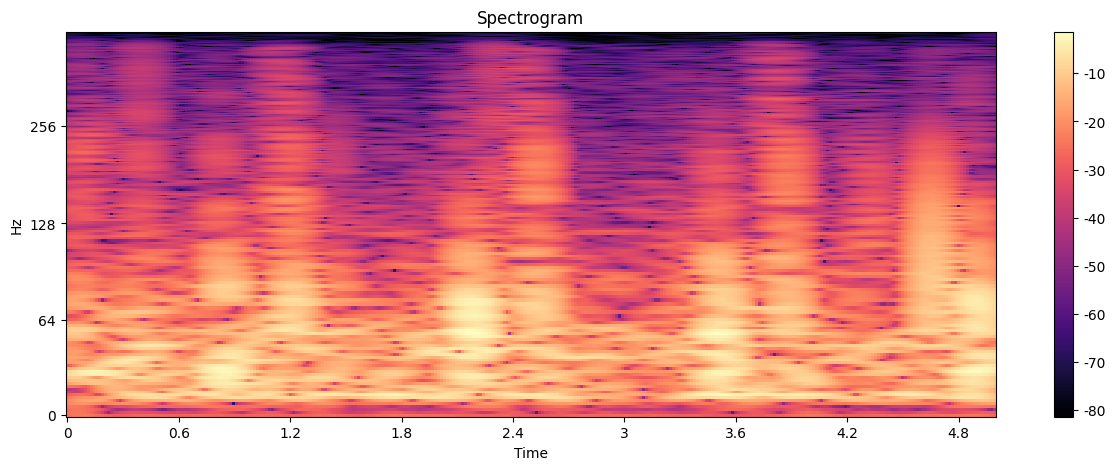

In [35]:
# Normal Signal:
spectrogram(signal=NORMAL_SIGNAL, sr=c.SAMPLING_RATE, frame_size=c.FRAME_SIZE, hop_size=16, 
            plot=True, save=False)

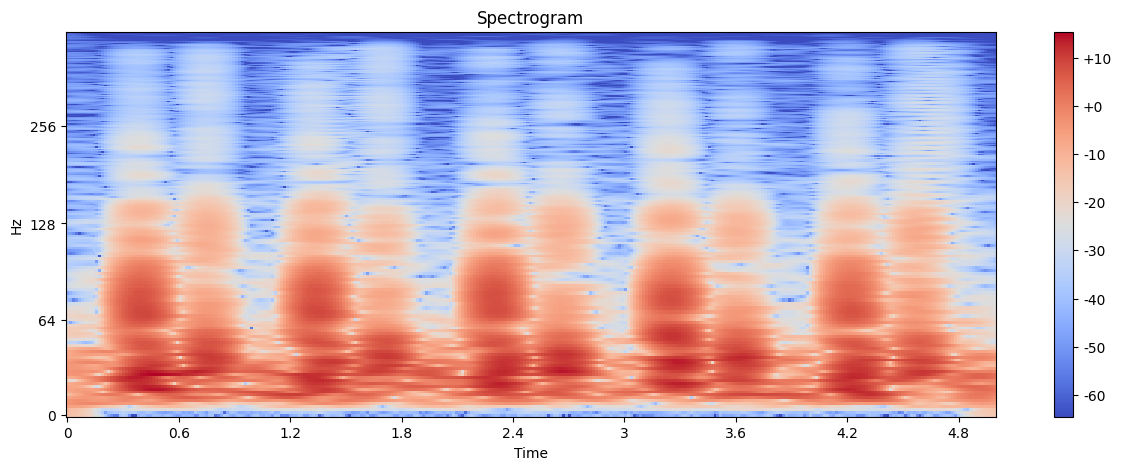

In [36]:
# Abnormal Signal:
spectrogram(signal=ABNORMAL_SIGNAL, sr=c.SAMPLING_RATE, frame_size=c.FRAME_SIZE, hop_size=16, 
            plot=True, save=False)

### 3.2. Mel-Spectrogram:

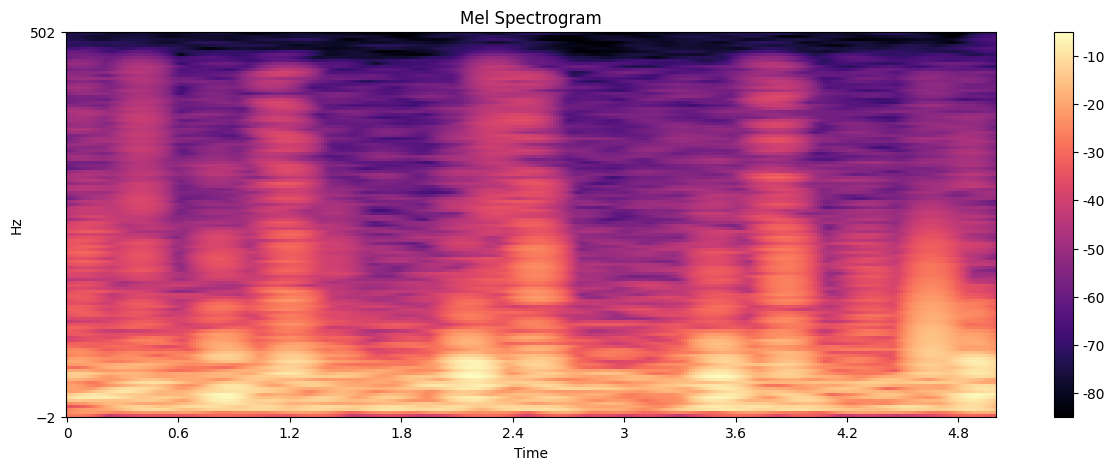

In [37]:
# Normal Signal:
mel_spectrogram(signal=NORMAL_SIGNAL, sr=c.SAMPLING_RATE, frame_size=c.FRAME_SIZE, hop_size=16, 
                n_mels=c.N_MELS, plot=True, save=False)

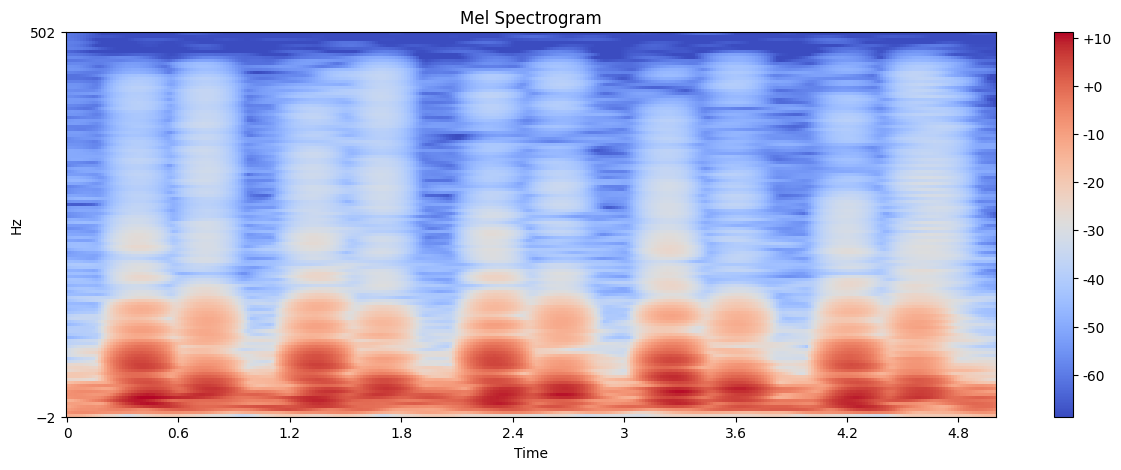

In [38]:
# Abnormal Signal:
mel_spectrogram(signal=ABNORMAL_SIGNAL, sr=c.SAMPLING_RATE, frame_size=c.FRAME_SIZE, hop_size=16, 
                n_mels=c.N_MELS, plot=True, save=False)

### 3.3. Mel frequency Cepstral Coefficients (MFCCs):
### 3.3.1. MFCCs:

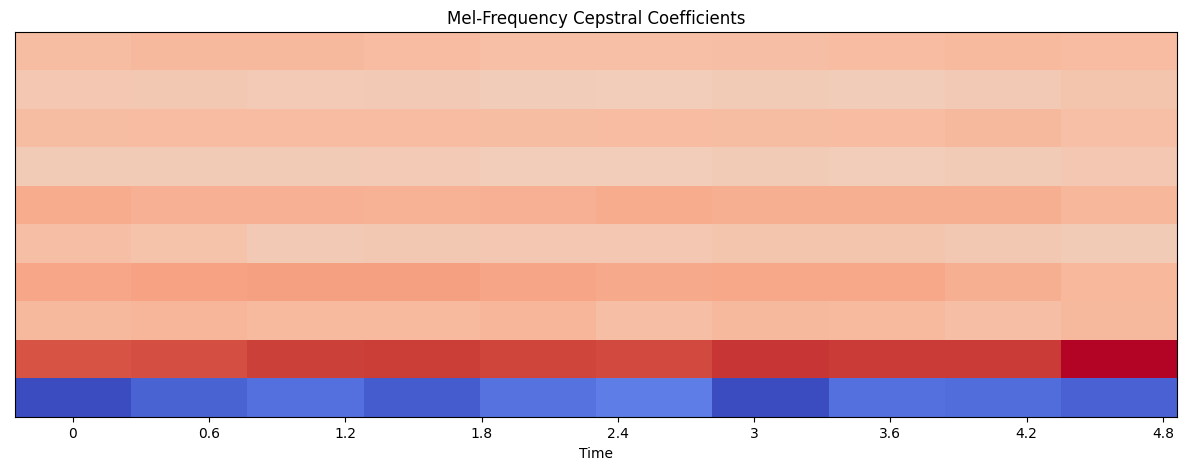

In [39]:
# Normal Signal:
mel_frequency_cepstral_coefficients(signal=NORMAL_SIGNAL, sr=c.SAMPLING_RATE, n_mfcc=10, mfcc_type='mfccs', 
                                    plot=True, save=False, des_stats=False)

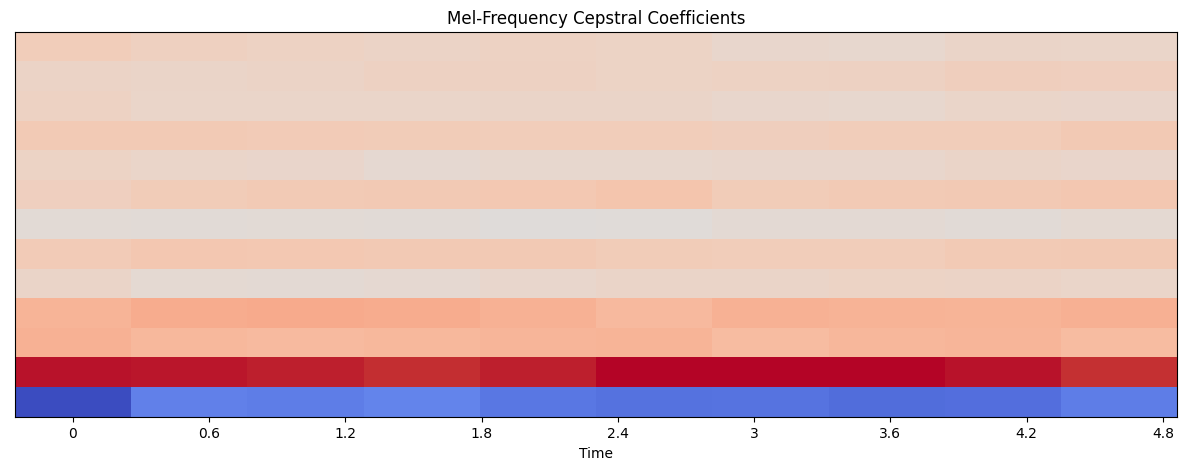

In [40]:
# Abnormal Signal:
mel_frequency_cepstral_coefficients(signal=ABNORMAL_SIGNAL, sr=c.SAMPLING_RATE, n_mfcc=c.N_MFCCS, mfcc_type='mfccs', 
                                    plot=True, save=False, img_ref='', des_stats=False)

In [41]:
# Descriptive Statistics based on MFCCs:
# Normal Signal:
MFCC_NORMAL_MAX, MFCC_NORMAL_MIN, MFCC_NORMAL_MEAN,\
MFCC_NORMAL_MEDIAN, MFCC_NORMAL_STD = mel_frequency_cepstral_coefficients(signal=NORMAL_SIGNAL, 
                                                                          sr=c.SAMPLING_RATE, 
                                                                          n_mfcc=c.N_MFCCS, 
                                                                          mfcc_type='mfccs', 
                                                                          plot=False,
                                                                          save=False,
                                                                          des_stats=True)
# Abnormal Signal:
MFCC_ABNORMAL_MAX, MFCC_ABNORMAL_MIN, MFCC_ABNORMAL_MEAN,\
MFCC_ABNORMAL_MEDIAN, MFCC_ABNORMAL_STD = mel_frequency_cepstral_coefficients(signal=ABNORMAL_SIGNAL, 
                                                                              sr=c.SAMPLING_RATE, 
                                                                              n_mfcc=c.N_MFCCS, 
                                                                              mfcc_type='mfccs', 
                                                                              plot=False, 
                                                                              save=False,
                                                                              des_stats=True)

# Creating DataFrame for the Descriptive Statistics:
MFCC_DATA = {'Normal': [MFCC_NORMAL_MAX, MFCC_NORMAL_MIN, MFCC_NORMAL_MEAN,MFCC_NORMAL_MEDIAN, 
                        MFCC_NORMAL_STD],
        'Abnormal': [MFCC_ABNORMAL_MAX, MFCC_ABNORMAL_MIN, MFCC_ABNORMAL_MEAN, MFCC_ABNORMAL_MEDIAN,
                     MFCC_ABNORMAL_STD]}
MFCC_DATAFRAME = pd.DataFrame(MFCC_DATA, index=['Max', 'Min', 'Mean', 'Median', 'STD'])
MFCC_DATAFRAME

,Normal,Abnormal
Max,192.189932,196.264373
Min,-349.016618,-273.578770
Mean,-12.751407,-1.408912
Median,-0.136089,-5.222684
STD,99.096105,85.284235


### 3.3.2. Delta_1:

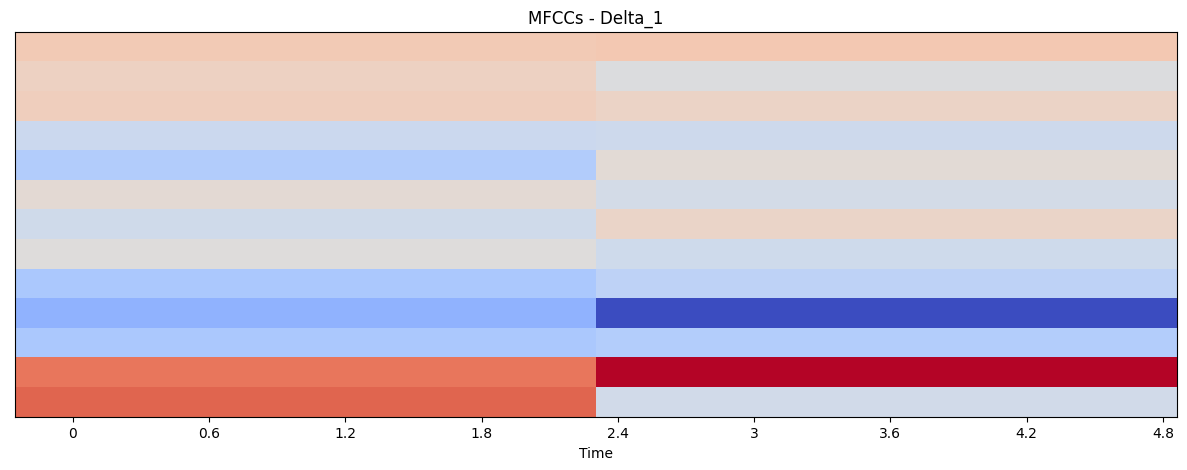

In [42]:
# Normal Signal:
mel_frequency_cepstral_coefficients(signal=NORMAL_SIGNAL, sr=c.SAMPLING_RATE, n_mfcc=c.N_MFCCS, mfcc_type='delta_1', 
                                    plot=True, save=False, img_ref='', des_stats=False)

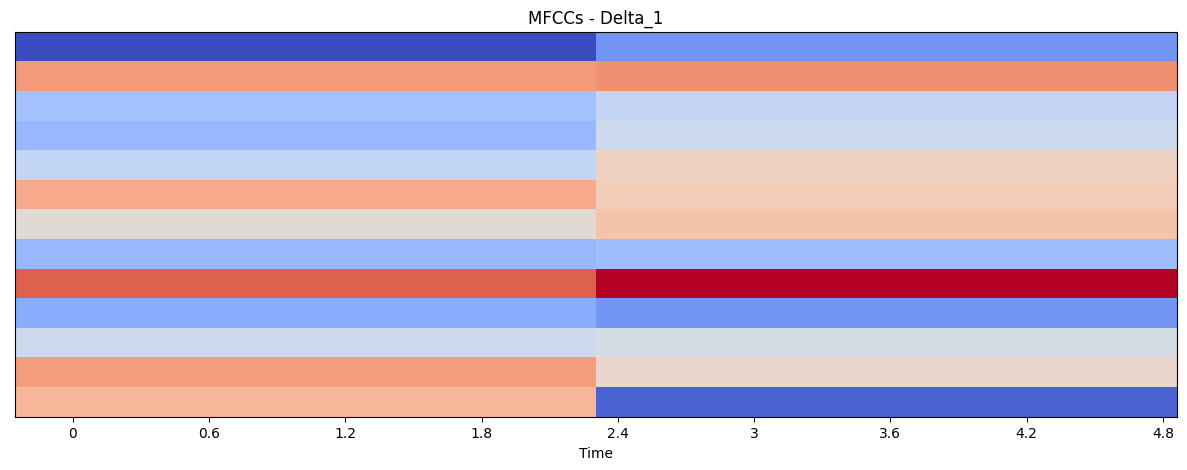

In [43]:
# Abnormal Signal:
mel_frequency_cepstral_coefficients(signal=ABNORMAL_SIGNAL, sr=c.SAMPLING_RATE, n_mfcc=c.N_MFCCS, mfcc_type='delta_1', 
                                    plot=True, save=False, img_ref='', des_stats=False)

In [44]:
# Descriptive Statistics based on MFCCs - Delta_1:
# Normal Signal:
DELTA1_NORMAL_MAX, DELTA1_NORMAL_MIN, DELTA1_NORMAL_MEAN,\
DELTA1_NORMAL_MEDIAN, DELTA1_NORMAL_STD = mel_frequency_cepstral_coefficients(signal=NORMAL_SIGNAL, 
                                                                              sr=c.SAMPLING_RATE, 
                                                                              n_mfcc=c.N_MFCCS, 
                                                                              mfcc_type='delta_1', 
                                                                              plot=False, 
                                                                              save=False,
                                                                              des_stats=True)

# Abnormal Signal:
DELTA1_ABNORMAL_MAX, DELTA1_ABNORMAL_MIN, DELTA1_ABNORMAL_MEAN,\
DELTA1_ABNORMAL_MEDIAN, DELTA1_ABNORMAL_STD = mel_frequency_cepstral_coefficients(signal=ABNORMAL_SIGNAL, 
                                                                                  sr=c.SAMPLING_RATE, 
                                                                                  n_mfcc=c.N_MFCCS, 
                                                                                  mfcc_type='delta_1', 
                                                                                  plot=False, 
                                                                                  save=False,
                                                                                  des_stats=True)

# Creating a DataFrame for the Descriptive Statistics:
DELTA1_DATA = {'Normal': [DELTA1_NORMAL_MAX, DELTA1_NORMAL_MIN, DELTA1_NORMAL_MEAN, DELTA1_NORMAL_MEDIAN, 
                        DELTA1_NORMAL_STD],
        'Abnormal': [DELTA1_ABNORMAL_MAX, DELTA1_ABNORMAL_MIN, DELTA1_ABNORMAL_MEAN, DELTA1_ABNORMAL_MEDIAN,
                     DELTA1_ABNORMAL_STD]}
DELTA1_DATAFRAME = pd.DataFrame(DELTA1_DATA, index=['Max', 'Min', 'Mean', 'Median', 'STD'])
DELTA1_DATAFRAME

,Normal,Abnormal
Max,3.837937,2.211099
Min,-3.701033,-2.129623
Mean,0.058880,-0.061140
Median,-0.090285,-0.135748
STD,1.451731,1.078259


### 3.3.3. Delta_2:

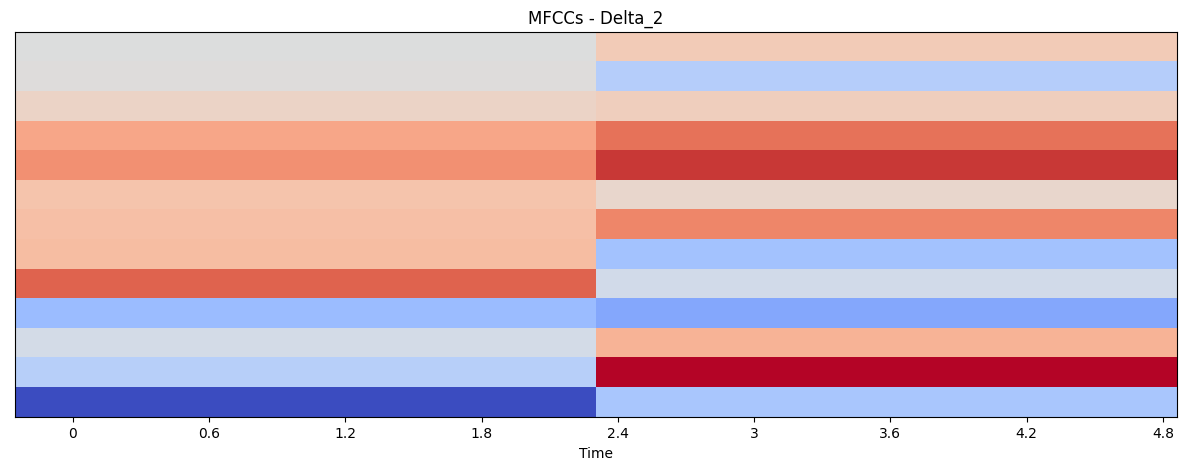

In [45]:
# Normal Signal:
mel_frequency_cepstral_coefficients(signal=NORMAL_SIGNAL, sr=c.SAMPLING_RATE, n_mfcc=c.N_MFCCS, mfcc_type='delta_2', 
                                    plot=True, save=False, img_ref='', des_stats=False)

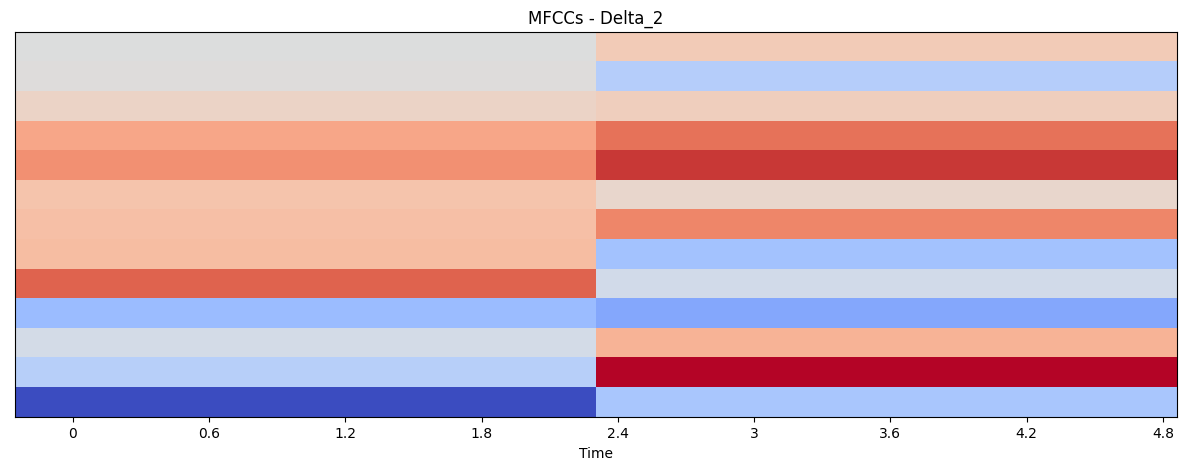

In [46]:
# Abnormal Signal:
mel_frequency_cepstral_coefficients(signal=NORMAL_SIGNAL, sr=c.SAMPLING_RATE, n_mfcc=c.N_MFCCS, mfcc_type='delta_2', 
                                    plot=True, save=False, img_ref='', des_stats=False)

In [47]:
# Descriptive Statistics based on MFCCs - Delta_2:
# Normal Signal:
DELTA2_NORMAL_MAX, DELTA2_NORMAL_MIN, DELTA2_NORMAL_MEAN,\
DELTA2_NORMAL_MEDIAN, DELTA2_NORMAL_STD = mel_frequency_cepstral_coefficients(signal=NORMAL_SIGNAL, 
                                                                              sr=c.SAMPLING_RATE, 
                                                                              n_mfcc=c.N_MFCCS, 
                                                                              mfcc_type='delta_2', 
                                                                              plot=False, 
                                                                              save=False,
                                                                              des_stats=True)

# Abnormal Signal:
DELTA2_ABNORMAL_MAX, DELTA2_ABNORMAL_MIN, DELTA2_ABNORMAL_MEAN,\
DELTA2_ABNORMAL_MEDIAN, DELTA2_ABNORMAL_STD = mel_frequency_cepstral_coefficients(signal=ABNORMAL_SIGNAL, 
                                                                                  sr=c.SAMPLING_RATE, 
                                                                                  n_mfcc=c.N_MFCCS, 
                                                                                  mfcc_type='delta_2', 
                                                                                  plot=False, 
                                                                                  save=False,
                                                                                  des_stats=True)

# Creating a DataFrame for the Descriptive Statistics:
DELTA2_DATA = {'Normal': [DELTA2_NORMAL_MAX, DELTA2_NORMAL_MIN, DELTA2_NORMAL_MEAN, DELTA2_NORMAL_MEDIAN, 
                        DELTA2_NORMAL_STD],
        'Abnormal': [DELTA2_ABNORMAL_MAX, DELTA2_ABNORMAL_MIN, DELTA2_ABNORMAL_MEAN, DELTA2_ABNORMAL_MEDIAN,
                     DELTA2_ABNORMAL_STD]}
DELTA2_DATAFRAME = pd.DataFrame(DELTA2_DATA, index=['Max', 'Min', 'Mean', 'Median', 'STD'])
DELTA2_DATAFRAME

,Normal,Abnormal
Max,1.665360,1.357601
Min,-2.149711,-3.825187
Mean,-0.002301,0.093095
Median,0.034923,0.345551
STD,0.881398,1.031053


### 3.4. Scalogram - Continuous Wavelet Transform (CWT):
### 3.4.1. Wavelet-Family - gaus1:

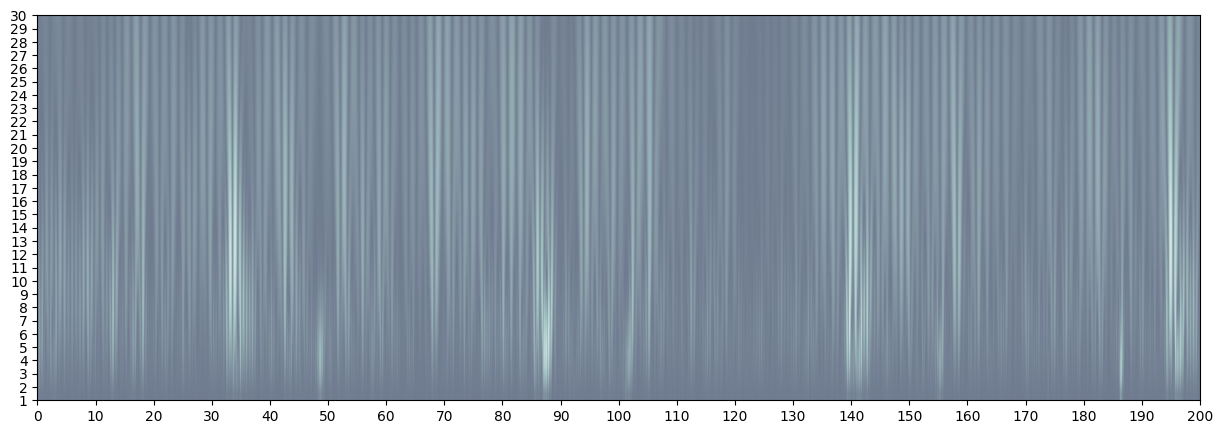

In [48]:
# Normal Signal:
cwt_scalogram(signal=NORMAL_SIGNAL, num_scales=c.N_SCALES, wavelet_family='gaus1', plot=True, save=False)

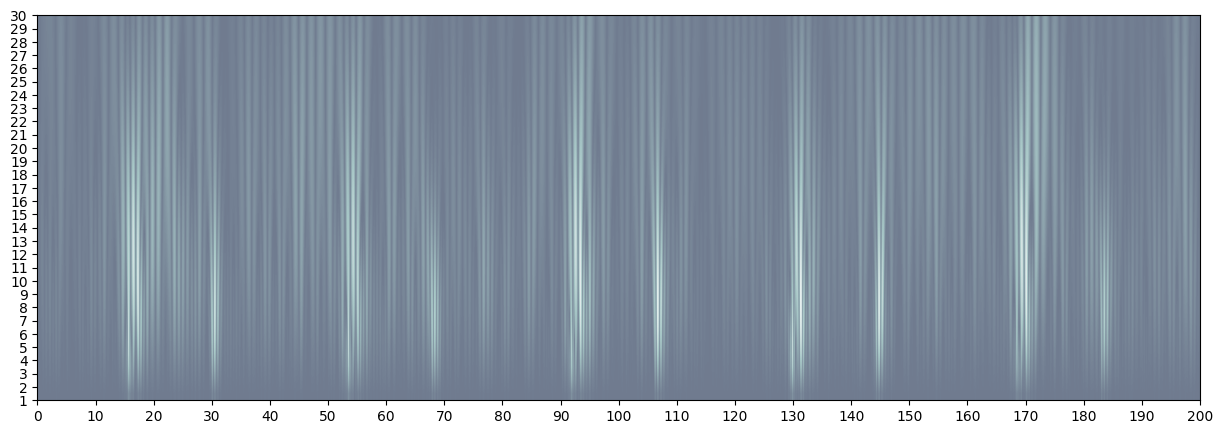

In [49]:
# Abnormal Signal:
cwt_scalogram(signal=ABNORMAL_SIGNAL, num_scales=c.N_SCALES, wavelet_family='gaus1', plot=True, save=False)

### 3.4.2. Wavelet-Family - cgau1:

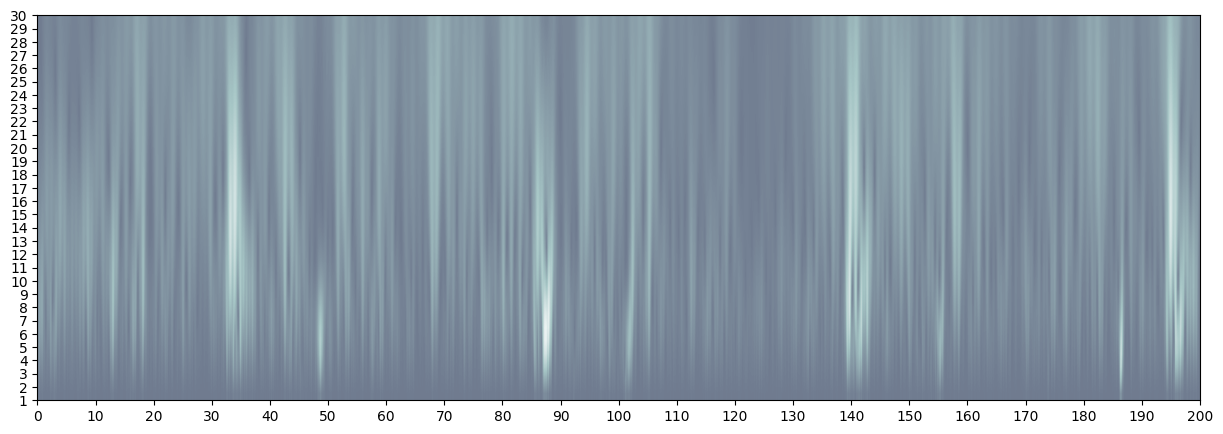

In [50]:
# Normal Signal:
cwt_scalogram(signal=NORMAL_SIGNAL, num_scales=c.N_SCALES, wavelet_family='cgau1', plot=True, save=False)

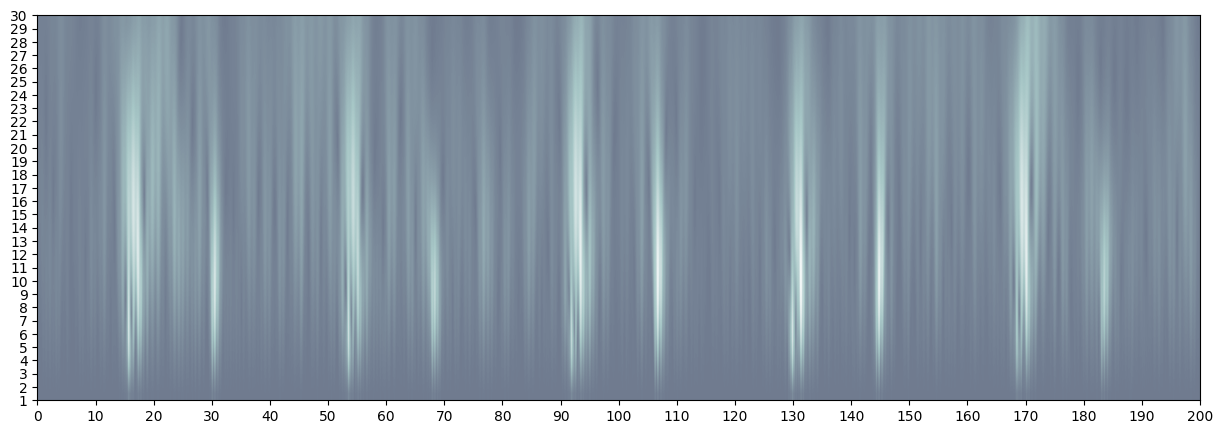

In [51]:
# Abnormal Signal:
cwt_scalogram(signal=ABNORMAL_SIGNAL, num_scales=c.N_SCALES, wavelet_family='cgau1', plot=True, save=False)

### 3.4.3. Wavelet-Family - cmor:

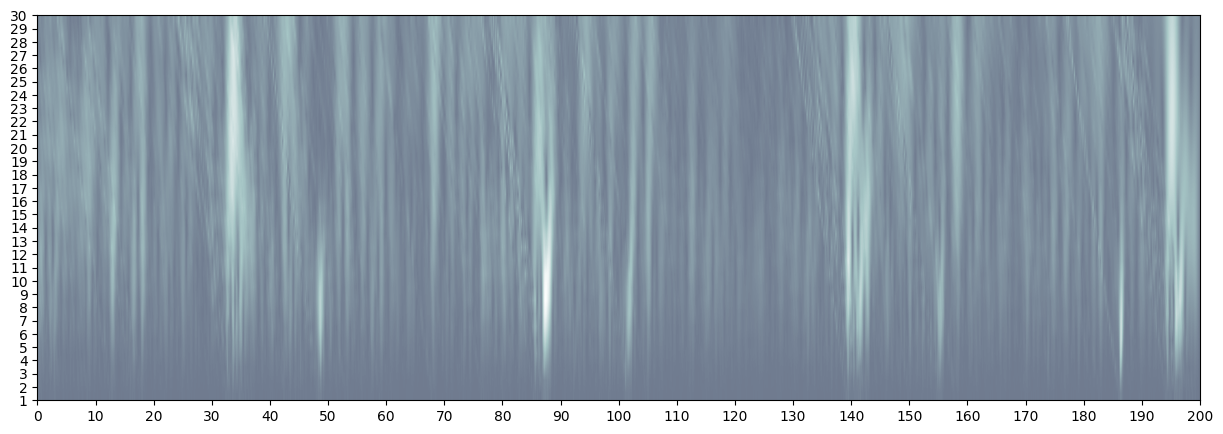

In [52]:
# Normal Signal:
cwt_scalogram(signal=NORMAL_SIGNAL, num_scales=c.N_SCALES, wavelet_family='cmor', plot=True, save=False)

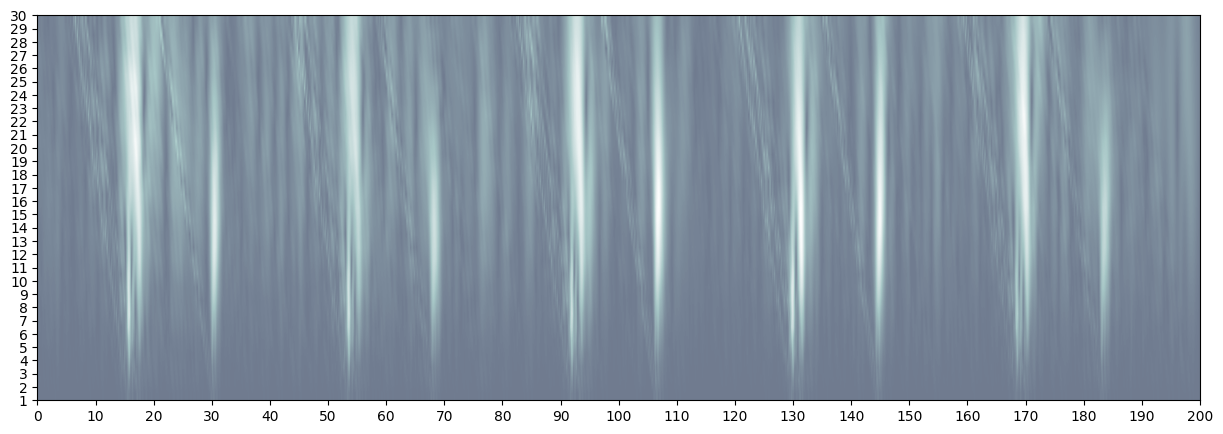

In [53]:
# Abnormal Signal:
cwt_scalogram(signal=ABNORMAL_SIGNAL, num_scales=c.N_SCALES, wavelet_family='cmor', plot=True, save=False)

### 3.4.4. Wavelet-Family - fbsp:

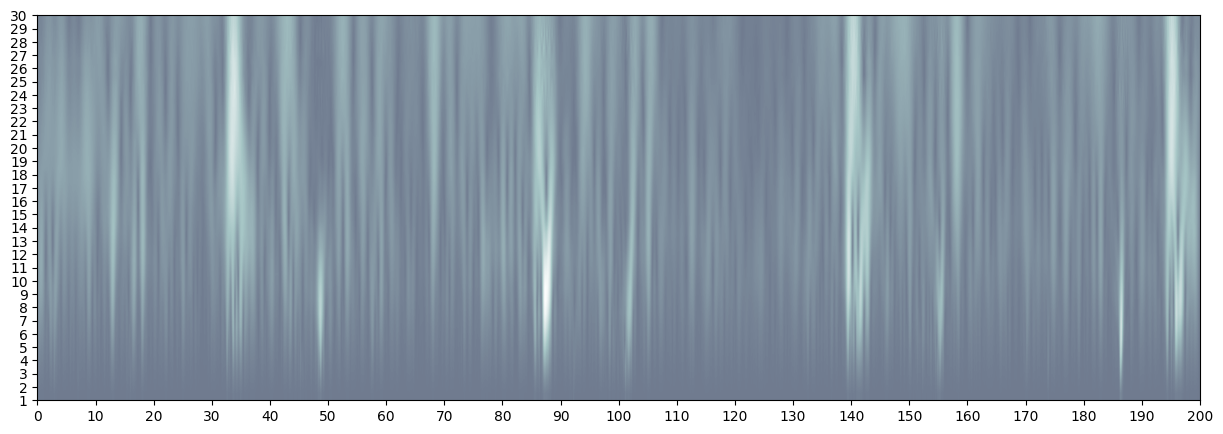

In [54]:
# Normal Signal:
cwt_scalogram(signal=NORMAL_SIGNAL, num_scales=c.N_SCALES, wavelet_family='fbsp', plot=True, save=False)

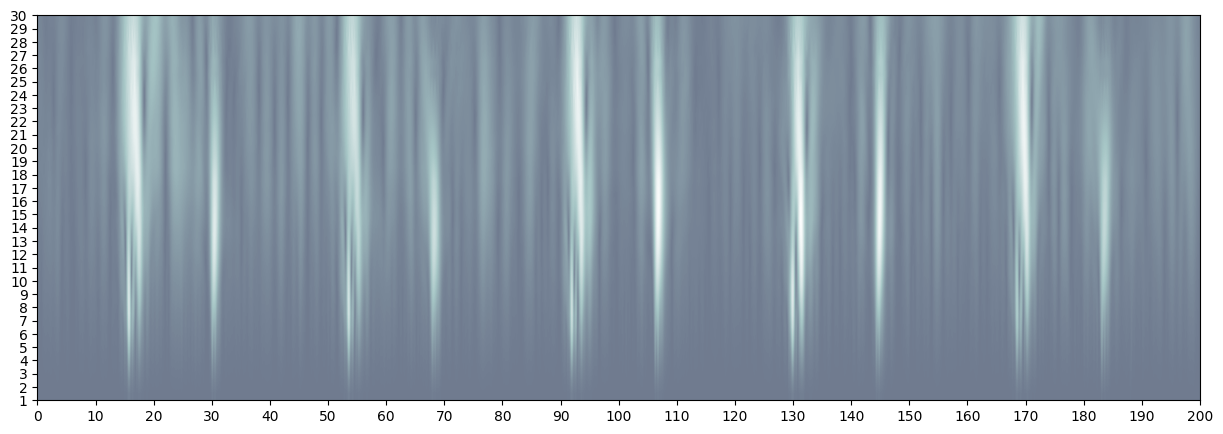

In [55]:
# Abnormal Signal:
cwt_scalogram(signal=ABNORMAL_SIGNAL, num_scales=c.N_SCALES, wavelet_family='fbsp', plot=True, save=False)

### 3.4.5. Wavelet-Family - mexh:

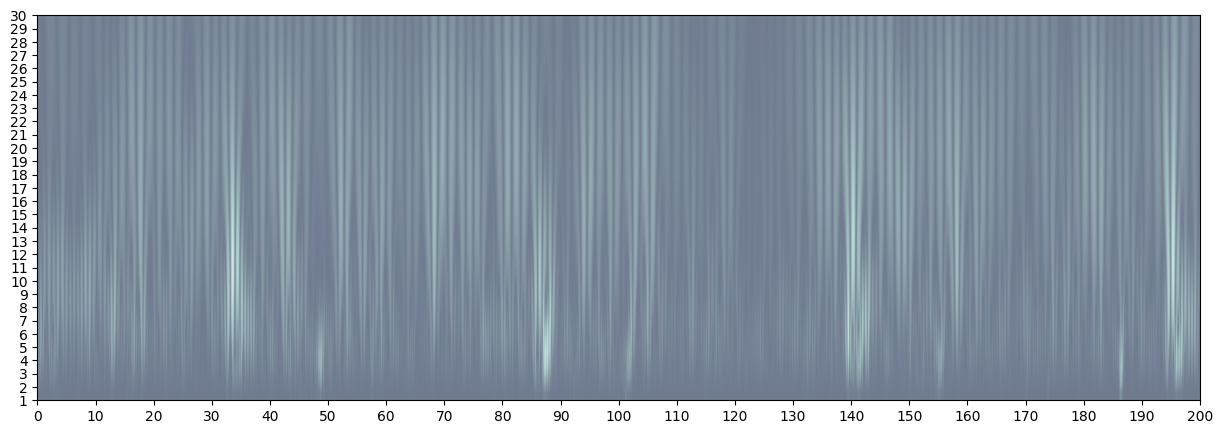

In [56]:
# Normal Signal:
cwt_scalogram(signal=NORMAL_SIGNAL, num_scales=c.N_SCALES, wavelet_family='mexh', plot=True, save=False)

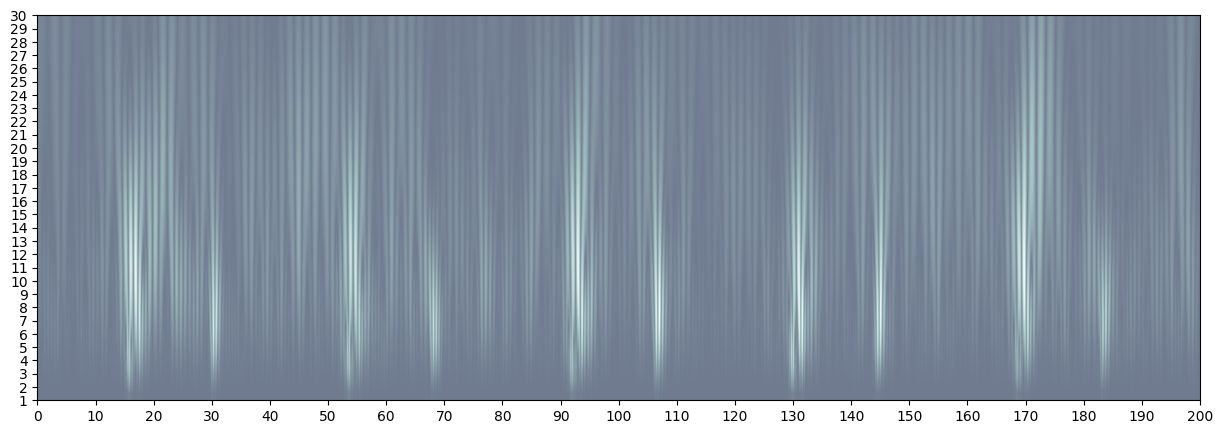

In [57]:
# ABnormal Signal:
cwt_scalogram(signal=ABNORMAL_SIGNAL, num_scales=c.N_SCALES, wavelet_family='mexh', plot=True, save=False)

### 3.4.6 Wavelet-Family - morl:

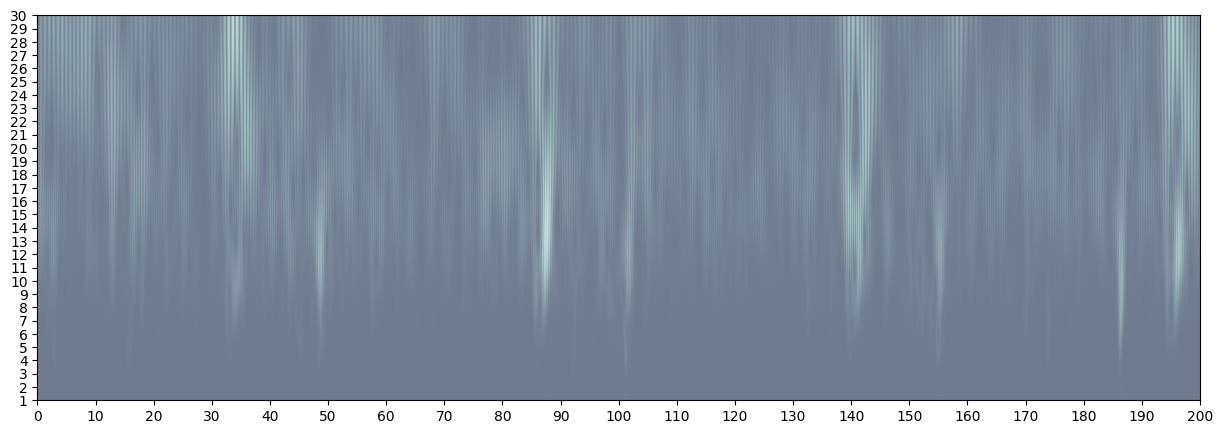

In [58]:
# Normal Signal:
cwt_scalogram(signal=NORMAL_SIGNAL, num_scales=c.N_SCALES, wavelet_family='morl', plot=True, save=False)

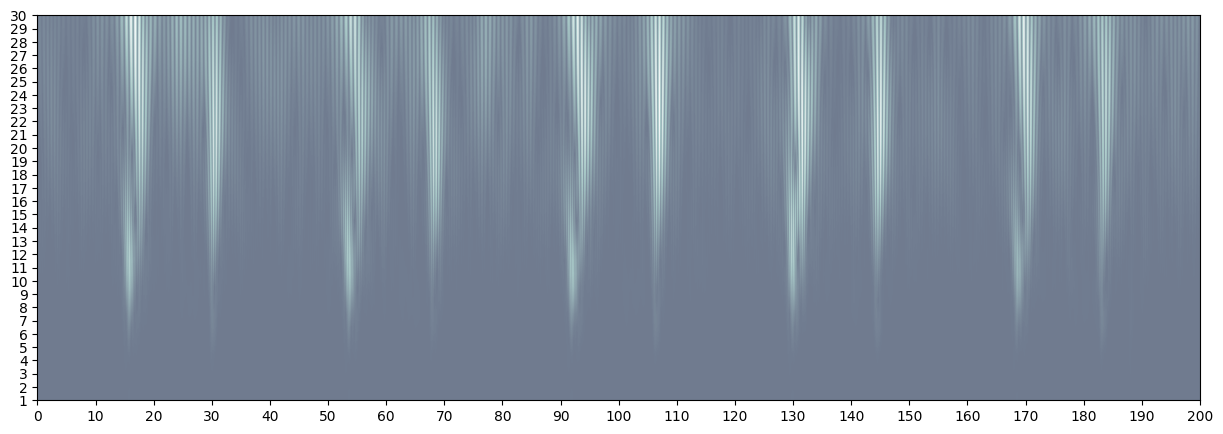

In [59]:
# Abnormal Signal:
cwt_scalogram(signal=ABNORMAL_SIGNAL, num_scales=c.N_SCALES, wavelet_family='morl', plot=True, save=False)

### 3.4.7. Wavelet-Family - shan:

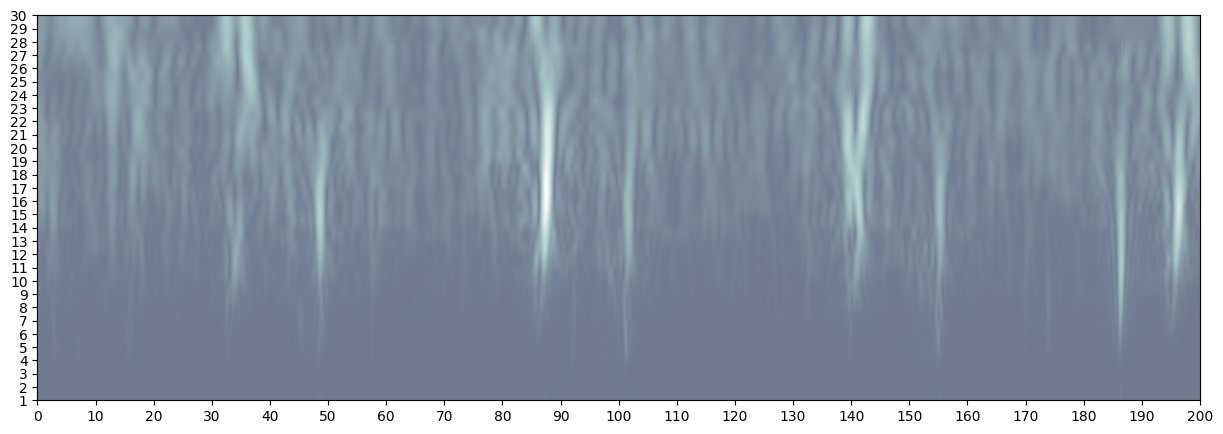

In [60]:
# Normal Signal:
cwt_scalogram(signal=NORMAL_SIGNAL, num_scales=c.N_SCALES, wavelet_family='shan', plot=True, save=False)

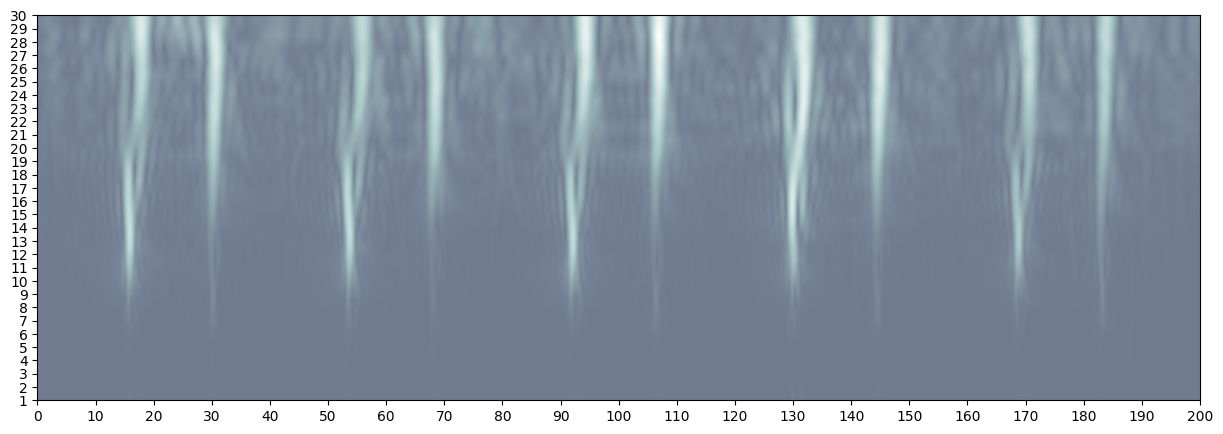

In [61]:
# Abnormal Signal:
cwt_scalogram(signal=ABNORMAL_SIGNAL, num_scales=c.N_SCALES, wavelet_family='shan', plot=True, save=False)

### 3.5. Discrete Wavelet Transform - Coefficients:
### 3.5.1. One-Level Decomposition:

In [62]:
# Descriptive Statistics based on Discrete Wavelet Transform Coefficients:
# Normal Signal:
CA_NORMAL_MAX, CA_NORMAL_MIN, CA_NORMAL_MEAN,\
CA_NORMAL_MEDIAN, CA_NORMAL_STD,\
CD_NORMAL_MAX, CD_NORMAL_MIN, CD_NORMAL_MEAN,\
CD_NORMAL_MEDIAN, CD_NORMAL_STD = dwt_coefficients(signal=NORMAL_SIGNAL, 
                                                   dwt_levels=False, 
                                                   plot=False, 
                                                   des_stats=True)

# Abnormal Signal:
CA_ABNORMAL_MAX, CA_ABNORMAL_MIN, CA_ABNORMAL_MEAN,\
CA_ABNORMAL_MEDIAN, CA_ABNORMAL_STD,\
CD_ABNORMAL_MAX, CD_ABNORMAL_MIN, CD_ABNORMAL_MEAN,\
CD_ABNORMAL_MEDIAN, CD_ABNORMAL_STD = dwt_coefficients(signal=ABNORMAL_SIGNAL, 
                                                        dwt_levels=False, 
                                                        plot=False, 
                                                        des_stats=True)

# Creating a DataFrame for the Descriptive Statistics:
COEFF_DATA = {'cA_Normal': [CA_NORMAL_MAX, CA_NORMAL_MIN, CA_NORMAL_MEAN, CA_NORMAL_MEDIAN, CA_NORMAL_STD],
               'cA_Abnormal': [CA_ABNORMAL_MAX, CA_ABNORMAL_MIN, CA_ABNORMAL_MEAN, CA_ABNORMAL_MEDIAN, 
                               CA_ABNORMAL_STD],
              'cD_Normal': [CD_NORMAL_MAX, CD_NORMAL_MIN, CD_NORMAL_MEAN, CD_NORMAL_MEDIAN, CD_NORMAL_STD],
              'cD_Abnormal': [CD_ABNORMAL_MAX, CD_ABNORMAL_MIN, CD_ABNORMAL_MEAN, CD_ABNORMAL_MEDIAN, 
                              CD_ABNORMAL_STD]}
COEFF_DATAFRAME = pd.DataFrame(COEFF_DATA, index=['Max', 'Min', 'Mean', 'Median', 'STD'])
COEFF_DATAFRAME

,cA_Normal,cA_Abnormal,cD_Normal,cD_Abnormal
Max,0.067095,0.305929,1.274386e-02,3.365481e-02
Min,-0.073454,-0.397560,-1.119911e-02,-2.630803e-02
Mean,-0.000260,-0.000052,2.679730e-07,-9.006074e-07
Median,0.000070,0.002202,7.948149e-06,-9.460940e-06
STD,0.001004,0.003087,1.004426e-03,3.087245e-03


### 3.5.2. Milti-Level Decomposition:

In [63]:
# Normal Signal:
_, CD5_NORMAL, CD4_NORMAL, CD3_NORMAL, CD2_NORMAL, CD1_NORMAL = dwt_coefficients(signal=NORMAL_SIGNAL, 
                                                                                 dwt_levels=True, 
                                                                                 plot=False)
print(f'length of Detailed Coefficients (level 1): {len(CD1_NORMAL)}')
print(f'length of Detailed Coefficients (level 2): {len(CD2_NORMAL)}')
print(f'length of Detailed Coefficients (level 3): {len(CD3_NORMAL)}')
print(f'length of Detailed Coefficients (level 4): {len(CD4_NORMAL)}')
print(f'length of Detailed Coefficients (level 5): {len(CD5_NORMAL)}')

length of Detailed Coefficients (level 1): 2501
length of Detailed Coefficients (level 2): 1252
length of Detailed Coefficients (level 3): 627
length of Detailed Coefficients (level 4): 315
length of Detailed Coefficients (level 5): 159


In [64]:
# Abnormal Signal:
_, CD5_ABNORMAL, CD4_ABNORMAL, CD3_ABNORMAL, CD2_ABNORMAL, CD1_ABNORMAL = dwt_coefficients(signal=ABNORMAL_SIGNAL, 
                                                                                           dwt_levels=True, 
                                                                                           plot=False)
print(f'length of Detailed Coefficients (level 1): {len(CD1_ABNORMAL)}')
print(f'length of Detailed Coefficients (level 2): {len(CD2_ABNORMAL)}')
print(f'length of Detailed Coefficients (level 3): {len(CD3_ABNORMAL)}')
print(f'length of Detailed Coefficients (level 4): {len(CD4_ABNORMAL)}')
print(f'length of Detailed Coefficients (level 5): {len(CD5_ABNORMAL)}')

length of Detailed Coefficients (level 1): 2501
length of Detailed Coefficients (level 2): 1252
length of Detailed Coefficients (level 3): 627
length of Detailed Coefficients (level 4): 315
length of Detailed Coefficients (level 5): 159


# Conclusion:
## 1. Numeric Data:
### Time Domain:
1. Descriptive Statistics: 5 Features
2. Energy and Power: 2 Features
3. Amplitude Envelope: 1 array ==> 5 Features
4. Root Mean Square Energy: 1 array ==> 5 Features
5. Zero-Crossing Rate (with_frames): 1 array ==> 5 Features
6. Zero-Crossing Rate (Complete Signal): 1 Feature

### Frequency Domain:
1. Peak Frequency: 2 Features
2. Band Energy Ratio: 1 array ==> 5 Features
3. Spectral Centriod: 1 array ==> 5 Features
4. Spectral Bandwidth: 1 array ==> 5 Features

### Time-Frequency Domain:
1. MFCCs: 1 array ==> 5 Features
2. MFCCs (Delta_1): 1 array ==> 5 Features
3. MFCCs (Delta_2): 1 array ==> 5 Features
4. DWT Coefficients (One-Level Decomposition): 4 arrays ==> 20 Features
5. DWT Coefficients (Multi-Level Decomposition): 5 arrays ==> 25 Features

**Total Features:** 93 Features


## 2. Images:
- Spectrogram
- Mel-Spectrogram
- MFCCs
- Delta_1
- Delta_2
- CWT-Scalogram

**Total images per method:** 12609 images